In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/laptop-price/laptop_price.csv',encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
#Dropping Irrelevant columns
df = df.drop(['laptop_ID'],axis=1)
df = df.drop(['Product'],axis=1)
df.rename({'Price_euros':'Price'},axis=1,inplace=True)

#NOw converting the currency from euro to PKR 297.11
def convert_currency(value):
    return value*297.11

df['Price'] = df['Price'].apply(convert_currency)

#One Hot Encoding
df = df.join(pd.get_dummies(df.Company).astype(int)).drop(['Company'],axis=1)
df = df.join(pd.get_dummies(df.TypeName).astype(int)).drop(['TypeName'],axis=1)




#Now extract the screen resolution only from the text
df['ScreenResolution'] = df.ScreenResolution.str.split(' ').apply(lambda x: x[-1])

#NOW create new features and based on width and height

df['Screen Width'] = df.ScreenResolution.str.split('x').apply(lambda x: x[0])
df['Screen Height'] = df.ScreenResolution.str.split('x').apply(lambda x: x[1])


#NOW drop the screen resolution column
df = df.drop(['ScreenResolution'],axis=1)

#WOrking on CPU 
df['Cpu Brand']=df.Cpu.str.split(' ').apply(lambda x: x[0])
df['Cpu Frequency'] = df.Cpu.str.split(' ').apply(lambda x: x[-1])
df = df.drop(['Cpu'],axis=1)

#Now we will remove the the GHz
df['Cpu Frequency'] = df['Cpu Frequency'].str[:-3]

#Removing GB from RAM
df['Ram'] = df['Ram'].str[:-2]

#COnverting RAM to int datatype
df['Ram'] = df['Ram'].astype(int)

#Now changing the dtypes
df['Screen Width']= df['Screen Width'].astype(int)
df['Screen Height']= df['Screen Height'].astype(int)
df['Cpu Frequency']= df['Cpu Frequency'].astype(float)


#Working on Memory column
df['Memory Amount'] = df.Memory.str.split(' ').apply(lambda x:x[0])
df['Memory Type'] = df.Memory.str.split(' ').apply(lambda x:x[1])

def turn_memory_into_MB(value):
    if 'GB' in value:
        return float(value[:value.find('GB')])*1000
    elif 'TB' in value:
        return float(value[:value.find('TB')])*1000000
    

df['Memory Amount'] = df['Memory Amount'].apply(turn_memory_into_MB)



#NOW drop the memory amount column
df = df.drop(['Memory'],axis=1)


#Working on Weight column
df['Weight'] = df['Weight'].str[:-2]
df['Weight'] = df['Weight'].astype(float)


#Working on GPU
df['Gpu Brand'] = df.Gpu.str.split(' ').apply(lambda x: x[0])
#NOW dropping the gpu column
df = df.drop(['Gpu'],axis=1)

df.head()

,Inches,Ram,OpSys,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,...,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,Cpu Brand,Cpu Frequency,Memory Amount,Memory Type,Gpu Brand
0,13.3,8,macOS,1.37,398035.2959,0,1,0,0,0,...,0,1,0,2560,1600,Intel,2.3,128000.0,SSD,Intel
1,13.3,8,macOS,1.34,267084.0634,0,1,0,0,0,...,0,1,0,1440,900,Intel,1.8,128000.0,Flash,Intel
2,15.6,8,No OS,1.86,170838.2500,0,0,0,0,0,...,1,0,0,1920,1080,Intel,2.5,256000.0,SSD,Intel
3,15.4,16,macOS,1.83,753901.7695,0,1,0,0,0,...,0,1,0,2880,1800,Intel,2.7,512000.0,SSD,AMD
4,13.3,8,macOS,1.37,535867.5960,0,1,0,0,0,...,0,1,0,2560,1600,Intel,3.1,256000.0,SSD,Intel


In [4]:
df = df.join(pd.get_dummies(df.OpSys).astype(int)).drop(['OpSys'],axis=1)
df.head()

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Gpu Brand,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13.3,8,1.37,398035.2959,0,1,0,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1
1,13.3,8,1.34,267084.0634,0,1,0,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1
2,15.6,8,1.86,170838.2500,0,0,0,0,0,0,...,Intel,0,0,0,0,1,0,0,0,0
3,15.4,16,1.83,753901.7695,0,1,0,0,0,0,...,AMD,0,0,0,0,0,0,0,0,1
4,13.3,8,1.37,535867.5960,0,1,0,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1


In [5]:
#NOW we join the Cpu brand name with CPU so that there is no confusion with GPU brand

cpu_categories = pd.get_dummies(df['Cpu Brand']).astype(int)
cpu_categories.columns = [col + '_Cpu' for col in cpu_categories.columns]

df = df.join(cpu_categories)



In [6]:
df.head()

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_Cpu,Intel_Cpu,Samsung_Cpu
0,13.3,8,1.37,398035.2959,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,13.3,8,1.34,267084.0634,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,15.6,8,1.86,170838.2500,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,15.4,16,1.83,753901.7695,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,13.3,8,1.37,535867.5960,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [7]:
#Now drop the cpu brand column
df = df.drop(['Cpu Brand'],axis=1)
df.head()

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_Cpu,Intel_Cpu,Samsung_Cpu
0,13.3,8,1.37,398035.2959,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,13.3,8,1.34,267084.0634,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,15.6,8,1.86,170838.2500,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,15.4,16,1.83,753901.7695,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,13.3,8,1.37,535867.5960,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [8]:
#NOW we join the Gpu brand name with GPU so that there is no confusion with GPU brand

gpu_categories = pd.get_dummies(df['Gpu Brand']).astype(int)
gpu_categories.columns = [col + '_Gpu' for col in gpu_categories.columns]

df = df.join(gpu_categories)
df.head()


,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Windows 10 S,Windows 7,macOS,AMD_Cpu,Intel_Cpu,Samsung_Cpu,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu
0,13.3,8,1.37,398035.2959,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,13.3,8,1.34,267084.0634,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,15.6,8,1.86,170838.2500,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,15.4,16,1.83,753901.7695,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,13.3,8,1.37,535867.5960,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [9]:
df = df.drop(['Gpu Brand'],axis=1)
df.head()

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Windows 10 S,Windows 7,macOS,AMD_Cpu,Intel_Cpu,Samsung_Cpu,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu
0,13.3,8,1.37,398035.2959,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,13.3,8,1.34,267084.0634,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,15.6,8,1.86,170838.2500,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,15.4,16,1.83,753901.7695,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,13.3,8,1.37,535867.5960,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inches              1303 non-null   float64
 1   Ram                 1303 non-null   int64  
 2   Weight              1303 non-null   float64
 3   Price               1303 non-null   float64
 4   Acer                1303 non-null   int64  
 5   Apple               1303 non-null   int64  
 6   Asus                1303 non-null   int64  
 7   Chuwi               1303 non-null   int64  
 8   Dell                1303 non-null   int64  
 9   Fujitsu             1303 non-null   int64  
 10  Google              1303 non-null   int64  
 11  HP                  1303 non-null   int64  
 12  Huawei              1303 non-null   int64  
 13  LG                  1303 non-null   int64  
 14  Lenovo              1303 non-null   int64  
 15  MSI                 1303 non-null   int64  
 16  Mediac

In [11]:
df = df.join(pd.get_dummies(df['Memory Type']).astype(int))
df.head()

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Intel_Cpu,Samsung_Cpu,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu,Flash,HDD,Hybrid,SSD
0,13.3,8,1.37,398035.2959,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,13.3,8,1.34,267084.0634,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,15.6,8,1.86,170838.2500,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,15.4,16,1.83,753901.7695,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,13.3,8,1.37,535867.5960,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [12]:
df = df.drop(['Memory Type'],axis=1)
df.head()

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Intel_Cpu,Samsung_Cpu,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu,Flash,HDD,Hybrid,SSD
0,13.3,8,1.37,398035.2959,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,13.3,8,1.34,267084.0634,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,15.6,8,1.86,170838.2500,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,15.4,16,1.83,753901.7695,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,13.3,8,1.37,535867.5960,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


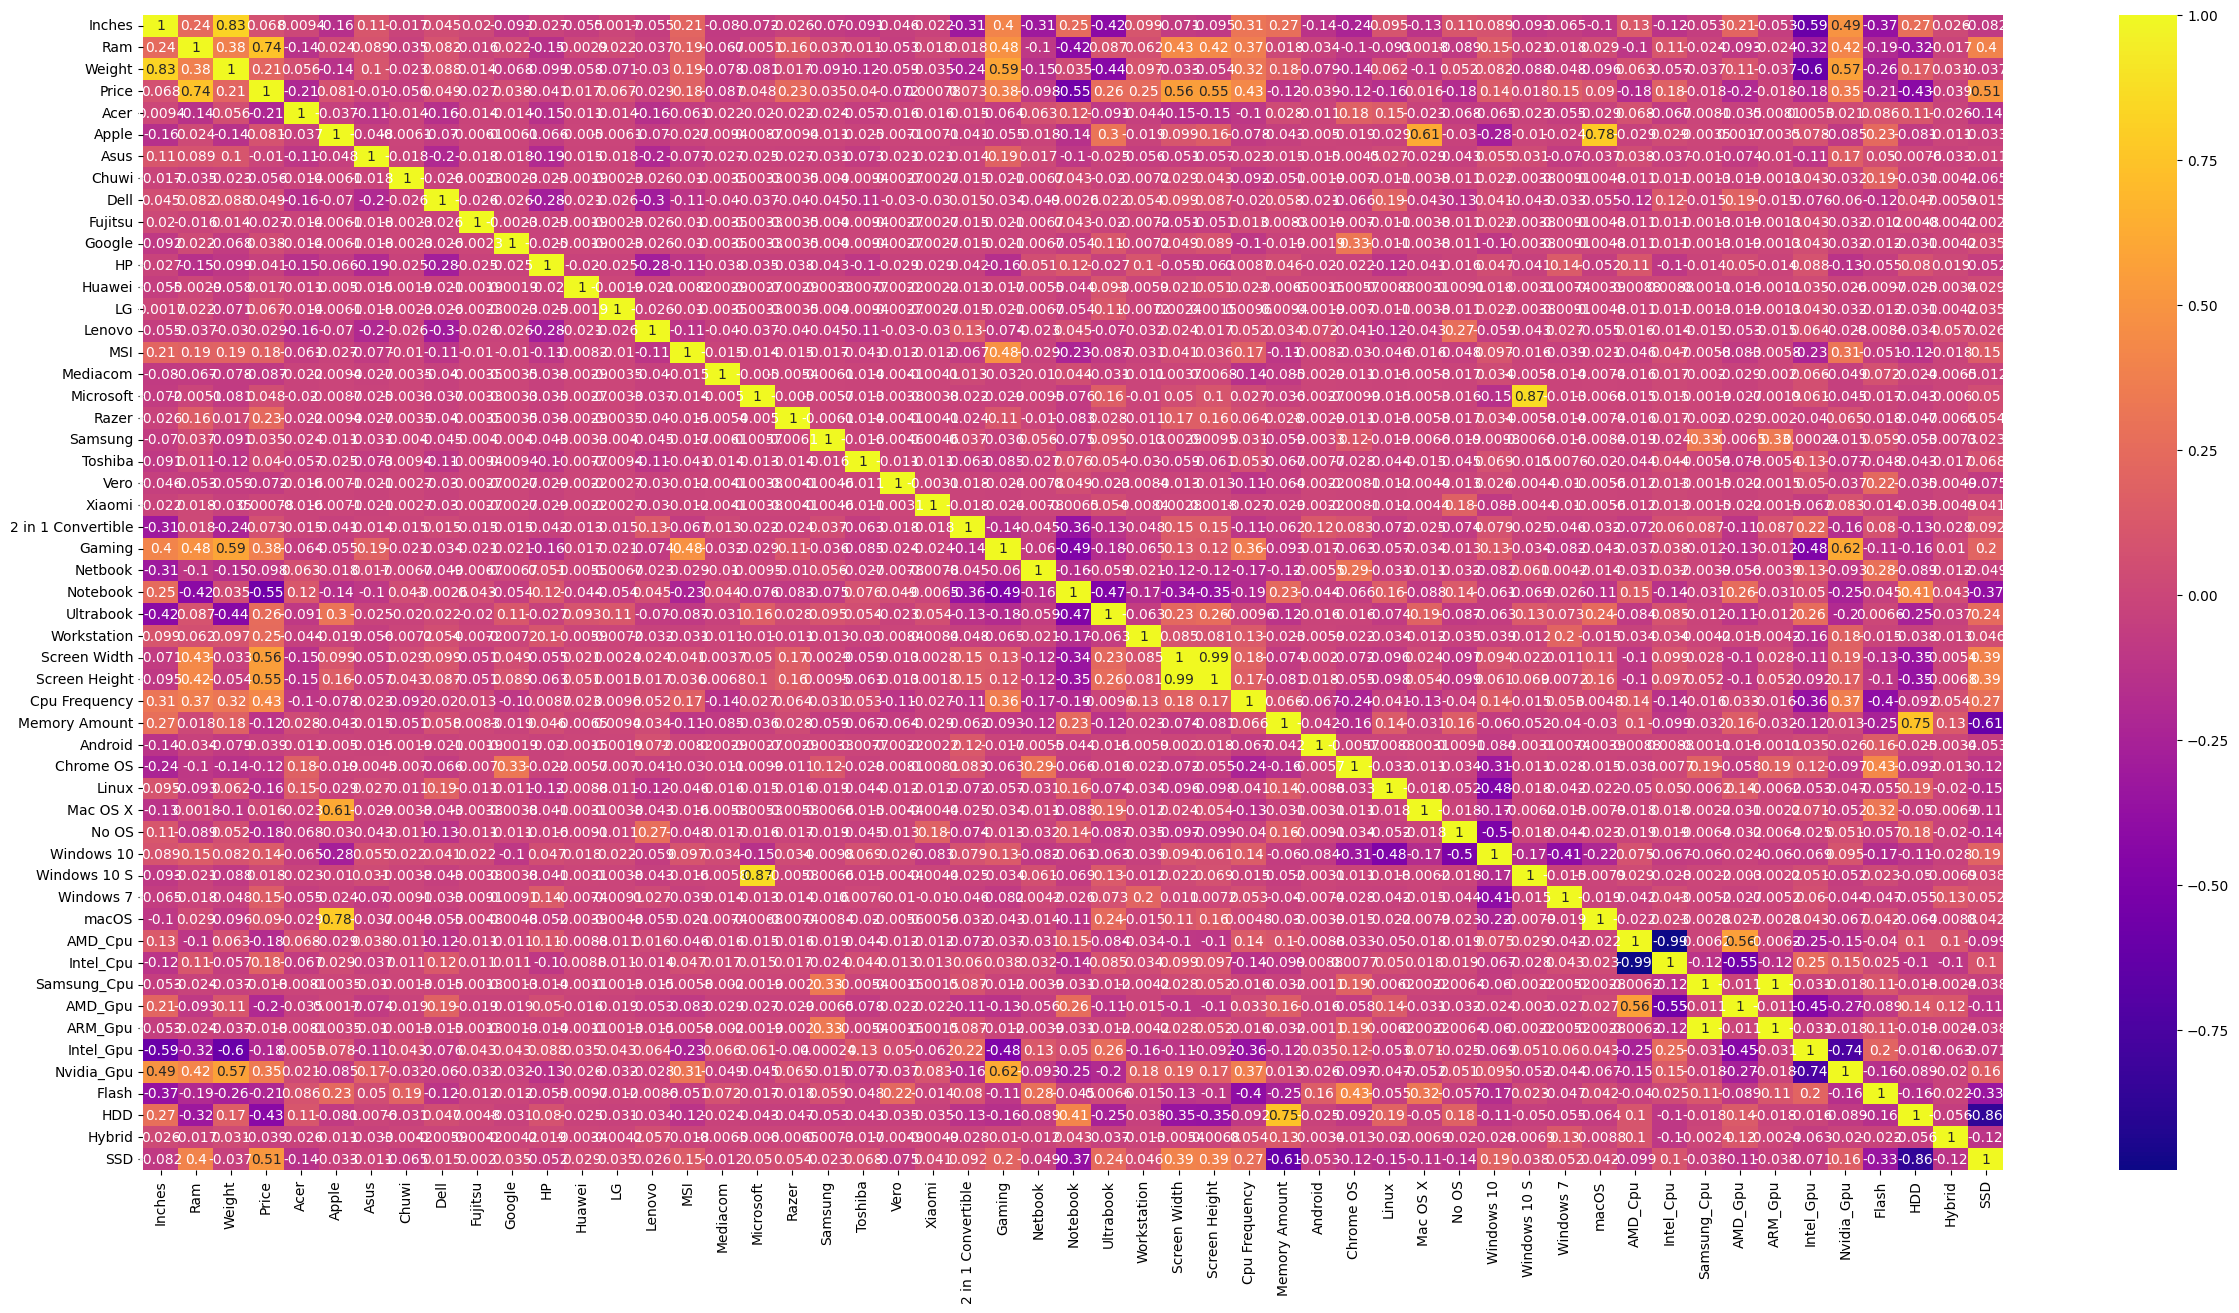

In [13]:
corr = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

Now we will only take those features from above list that are having a good correaltion with Price. THe top 20 features. Below top 20 we will drop

In [14]:
#THis is to check the correlation in list manner
target_corr = df.corr()['Price'].apply(abs).sort_values()
target_corr

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_Gpu               0.018431
Samsung_Cpu           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Hybrid                0.039386
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI     

In [15]:
selected_features = target_corr[-21:].index
selected_features = list(selected_features)
selected_features

['MSI',
 'AMD_Cpu',
 'Intel_Cpu',
 'Intel_Gpu',
 'AMD_Gpu',
 'Acer',
 'Weight',
 'Flash',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_Gpu',
 'Gaming',
 'HDD',
 'Cpu Frequency',
 'SSD',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price']

In [16]:
df2 = df[selected_features]
df2.head()

,MSI,AMD_Cpu,Intel_Cpu,Intel_Gpu,AMD_Gpu,Acer,Weight,Flash,Razer,Workstation,...,Nvidia_Gpu,Gaming,HDD,Cpu Frequency,SSD,Notebook,Screen Height,Screen Width,Ram,Price
0,0,0,1,1,0,0,1.37,0,0,0,...,0,0,0,2.3,1,0,1600,2560,8,398035.2959
1,0,0,1,1,0,0,1.34,1,0,0,...,0,0,0,1.8,0,0,900,1440,8,267084.0634
2,0,0,1,1,0,0,1.86,0,0,0,...,0,0,0,2.5,1,1,1080,1920,8,170838.2500
3,0,0,1,0,1,0,1.83,0,0,0,...,0,0,0,2.7,1,0,1800,2880,16,753901.7695
4,0,0,1,1,0,0,1.37,0,0,0,...,0,0,0,3.1,1,0,1600,2560,8,535867.5960


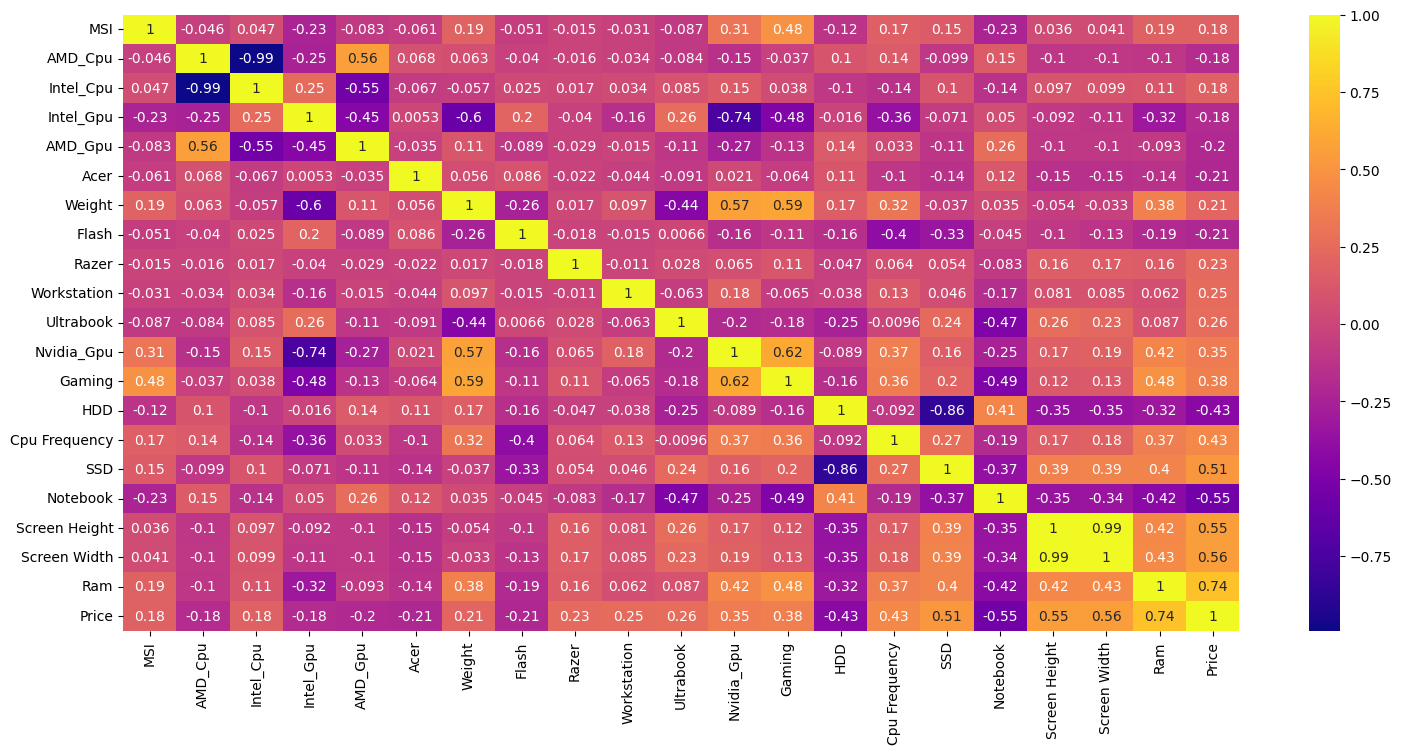

In [20]:
corr = df2.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inches              1303 non-null   float64
 1   Ram                 1303 non-null   int64  
 2   Weight              1303 non-null   float64
 3   Price               1303 non-null   float64
 4   Acer                1303 non-null   int64  
 5   Apple               1303 non-null   int64  
 6   Asus                1303 non-null   int64  
 7   Chuwi               1303 non-null   int64  
 8   Dell                1303 non-null   int64  
 9   Fujitsu             1303 non-null   int64  
 10  Google              1303 non-null   int64  
 11  HP                  1303 non-null   int64  
 12  Huawei              1303 non-null   int64  
 13  LG                  1303 non-null   int64  
 14  Lenovo              1303 non-null   int64  
 15  MSI                 1303 non-null   int64  
 16  Mediac

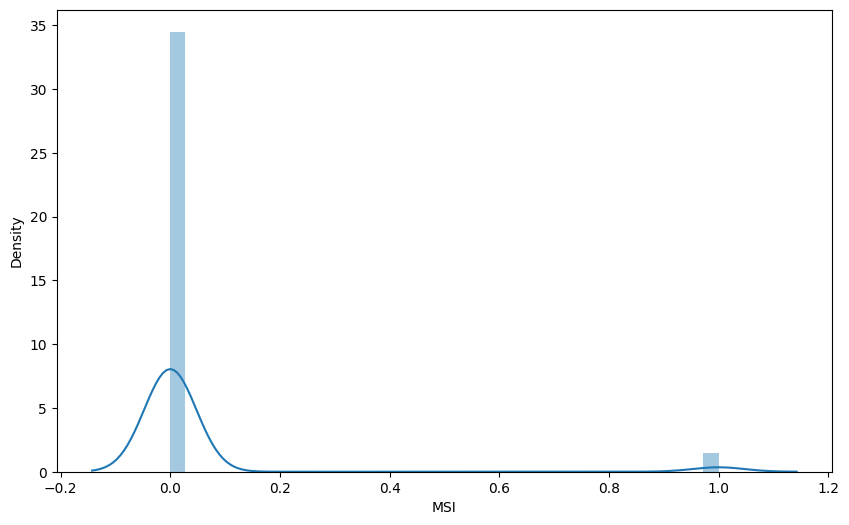

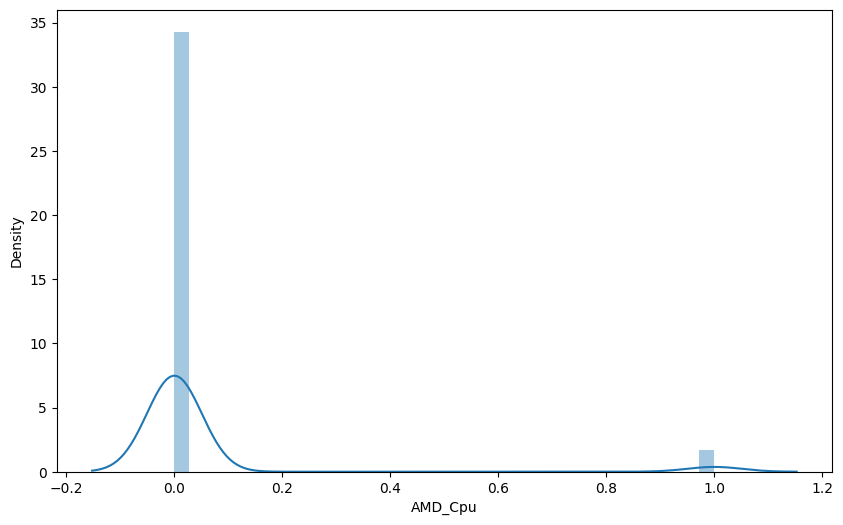

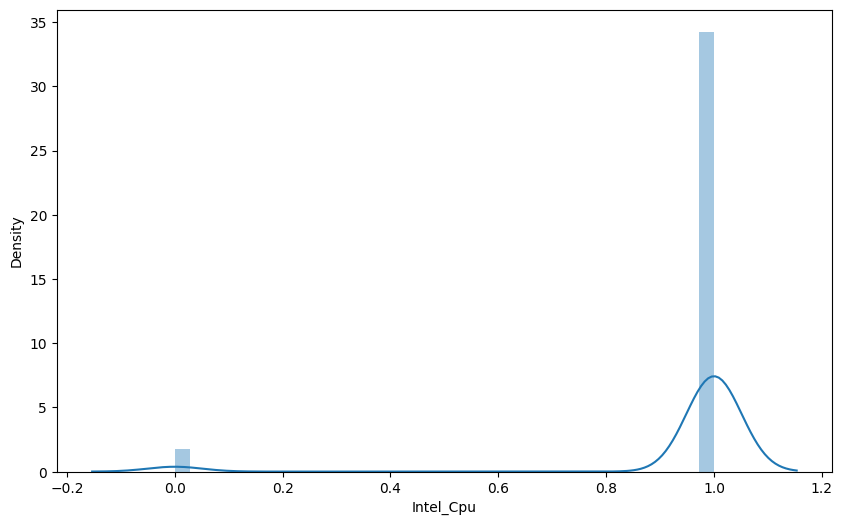

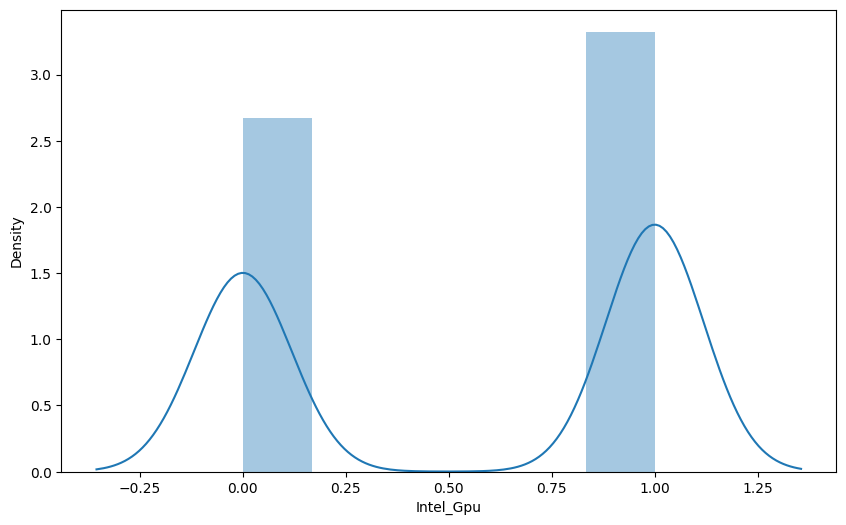

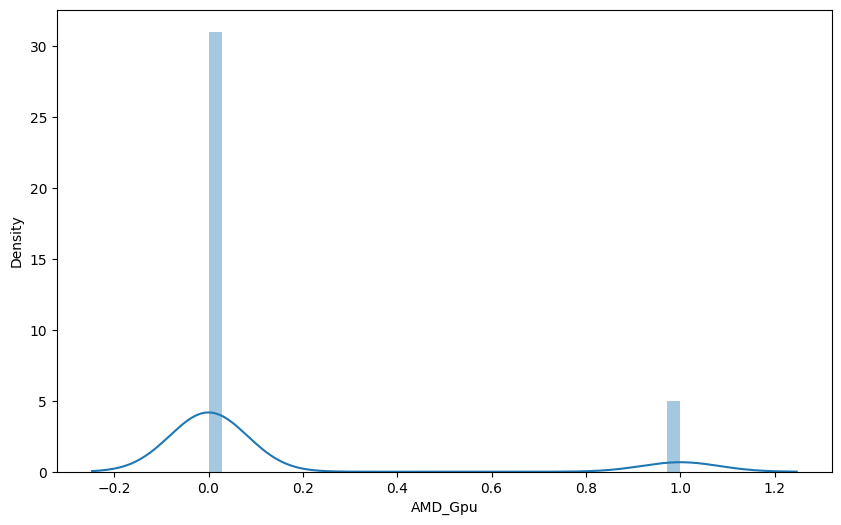

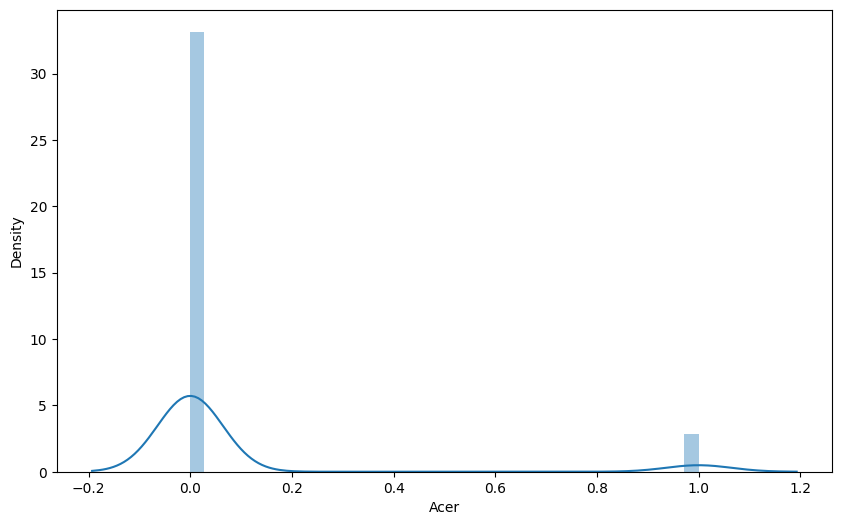

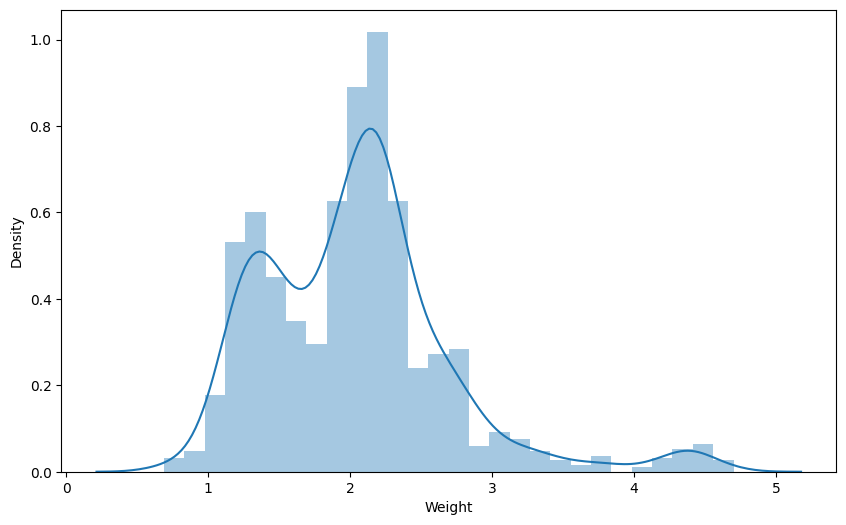

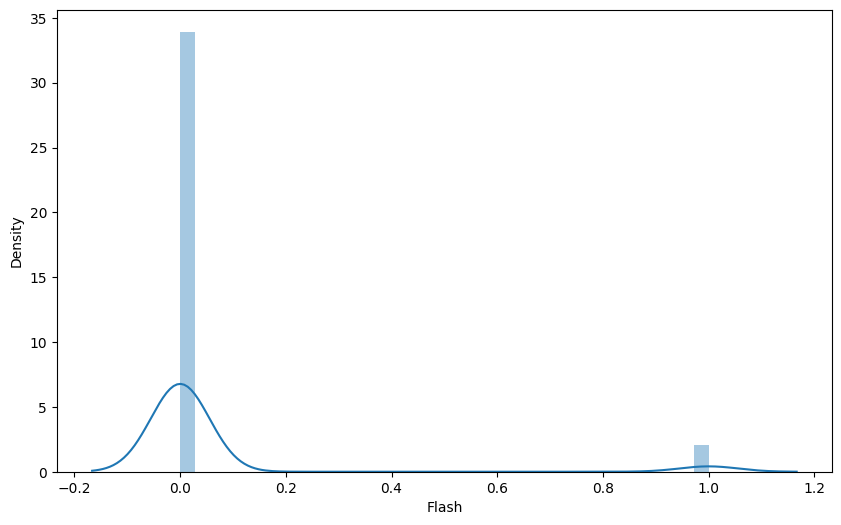

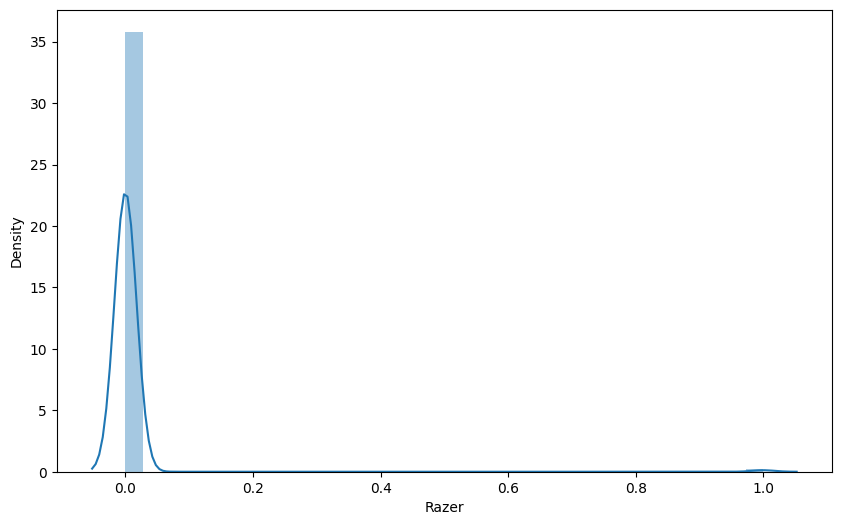

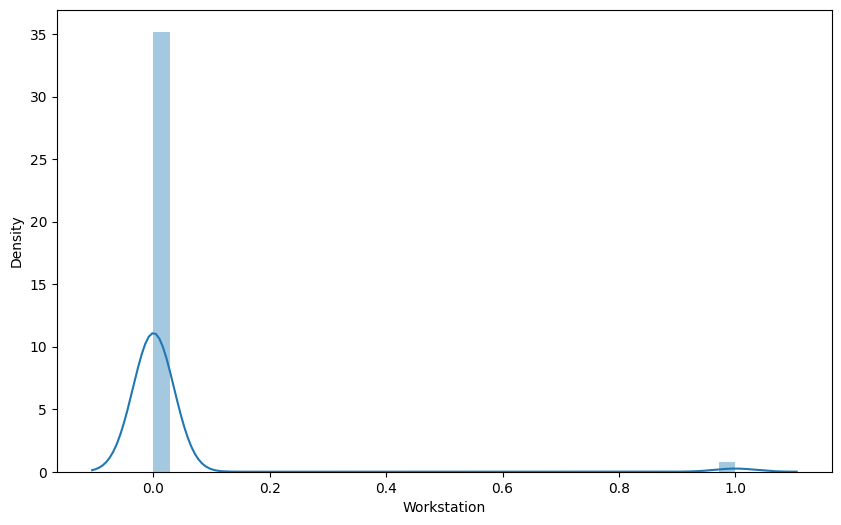

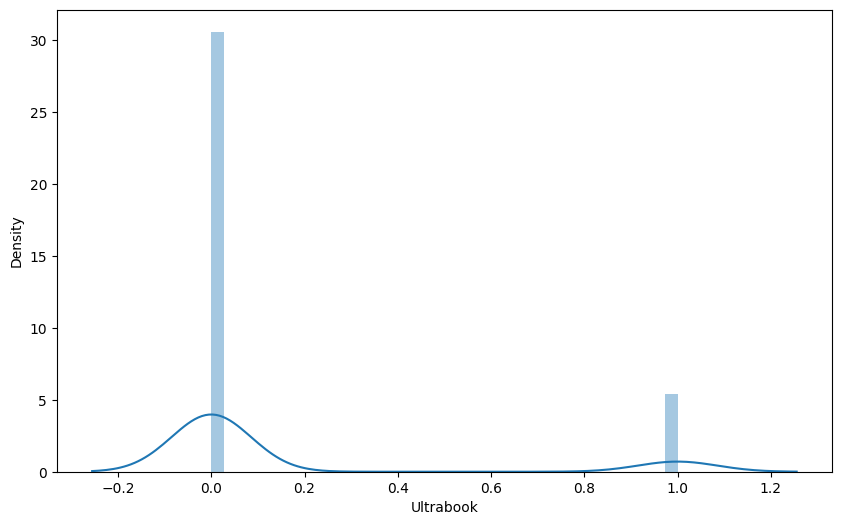

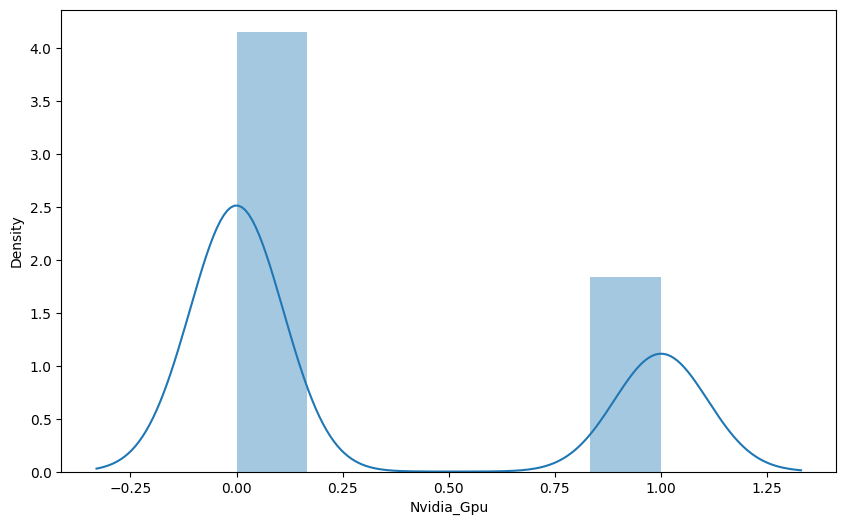

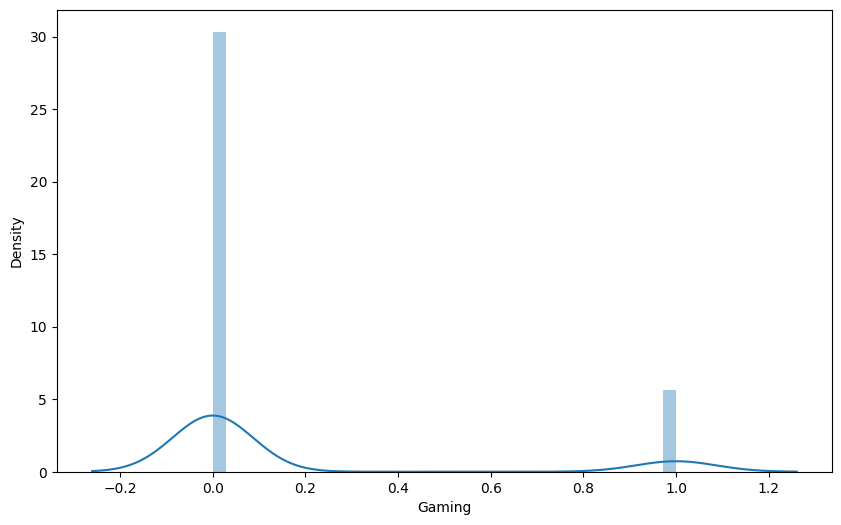

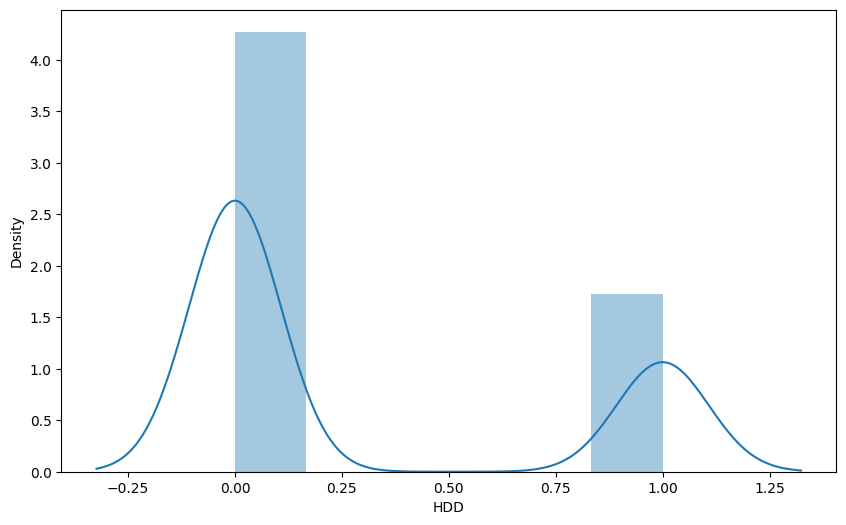

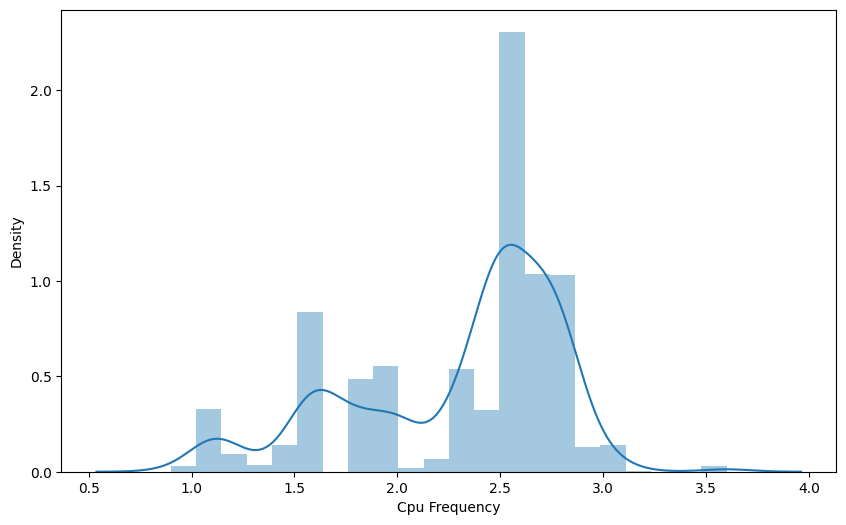

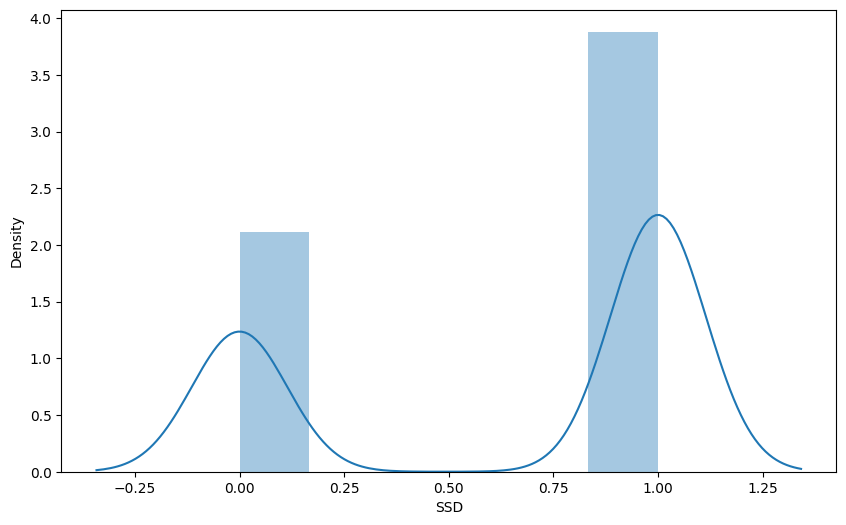

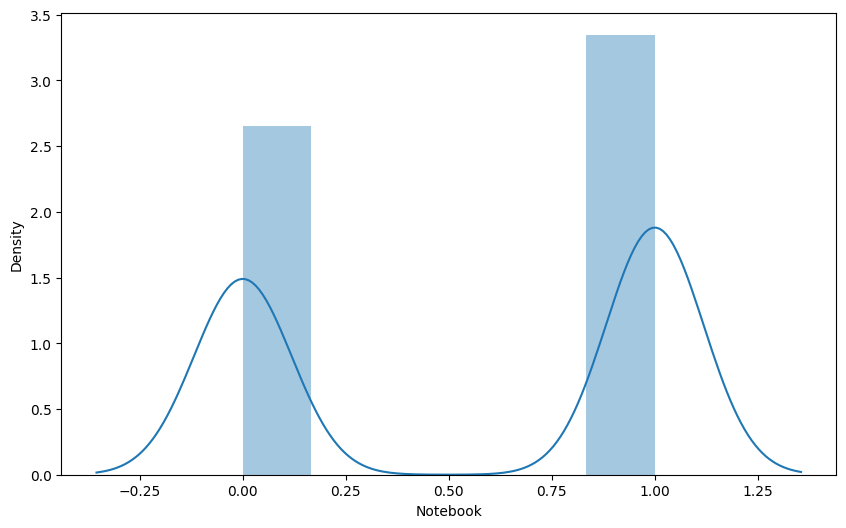

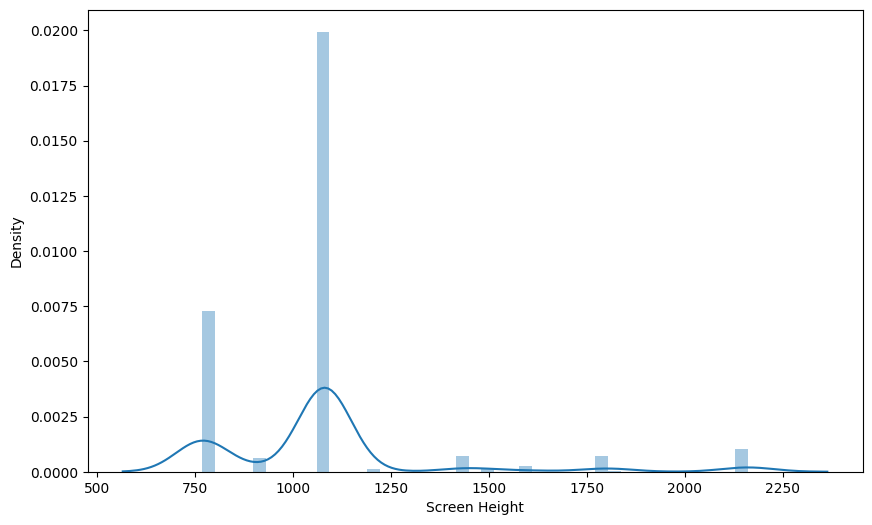

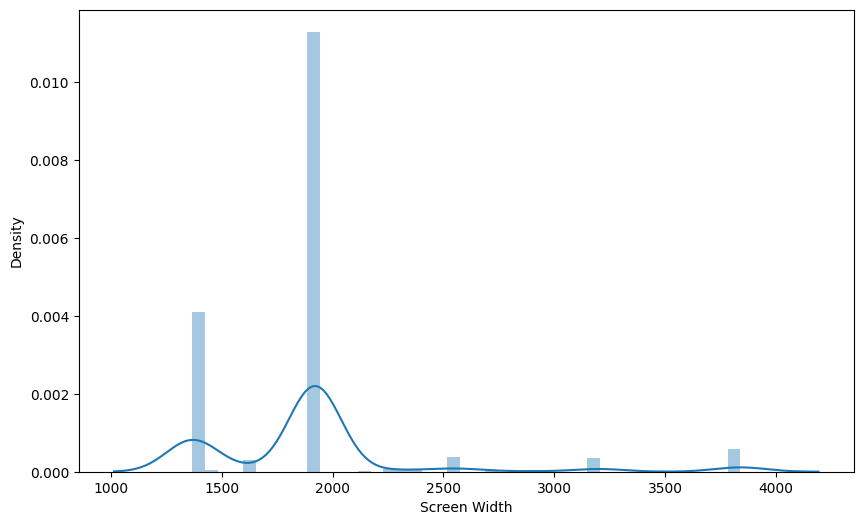

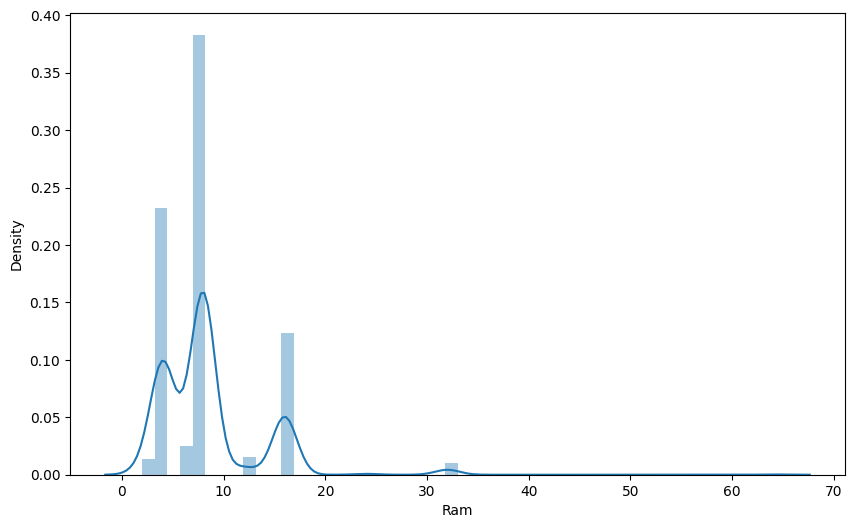

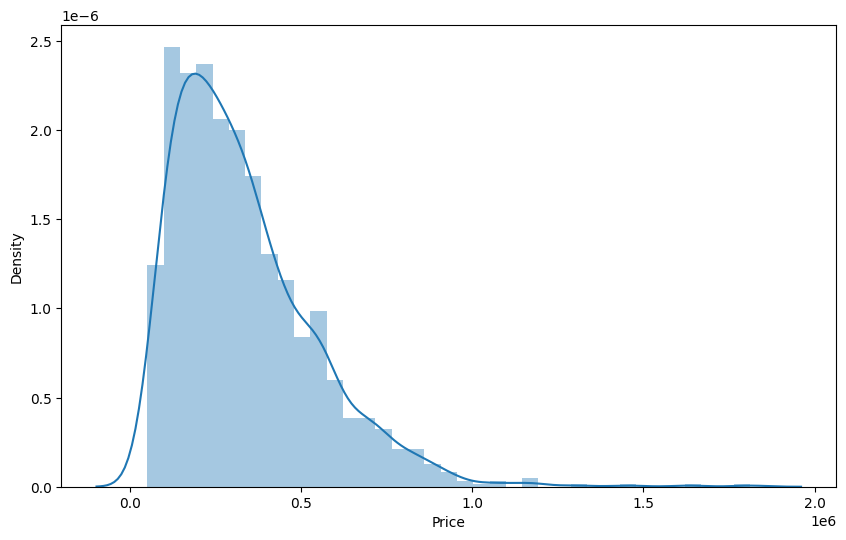

In [26]:
#check dist of all columns
for col in df2.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df2[col])
  plt.show()

In [ ]:
#Now lets split and train
x = df2.drop(['Price'],axis=1)
y = df2['Price']


#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)
svr.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)
lgb.fit(x_train_scaled,y_train)
gpr.fit(x_train_scaled,y_train)

In [23]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)

LINEAR REG  0.7407488607876256
RIDGE  0.7408645842741883
LASSO  0.7407044708225772
ELASTICNET 0.703211179141477
RANDOM FOREST  0.7990100521783614
GB 0.821461530103005
ADABOOST 0.6467159301016863
XGB 0.7867562949582853
KNN 0.6872891045401657
SVR -0.029315705745874387
CAT 0.8264077913804417
LIGHTGBM 0.7522921949512714
GUASSIAN PROCESS -3127.482969566792


LINEAR REG  0.7407488607876256

RIDGE  0.7408645842741883

LASSO  0.7407044708225772

ELASTICNET 0.703211179141477

RANDOM FOREST  0.7990100521783614

GB 0.821461530103005

ADABOOST 0.6467159301016863

XGB 0.7867562949582853

KNN 0.6872891045401657

SVR -0.029315705745874387

CAT 0.8264077913804417

LIGHTGBM 0.7522921949512714

GUASSIAN PROCESS -3127.482969566792

In [25]:
x_test.iloc[0]

MSI                 0.00
AMD_Cpu             0.00
Intel_Cpu           1.00
Intel_Gpu           1.00
AMD_Gpu             0.00
Acer                0.00
Weight              1.05
Flash               0.00
Razer               0.00
Workstation         0.00
Ultrabook           0.00
Nvidia_Gpu          0.00
Gaming              0.00
HDD                 0.00
Cpu Frequency       2.50
SSD                 1.00
Notebook            1.00
Screen Height    1080.00
Screen Width     1920.00
Ram                 8.00
Name: 479, dtype: float64